In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def q_t(t, T):
    """
    Potential term depending on time
    
    Parameters:
        t: time in the interval [0:T]
        T: Period of q(t)
    """
    return t/T

In [3]:
def time_evolution(psi_initial, omega, x0, N_space, N_time, T_sim, T_period): 
    psi_x = psi_initial
    psi_p = np.fft.fft(psi_x)
    dx = 2*x0/N_space
    dt = T_sim/N_time
    
    x = np.linspace(-x0,x0,N_space)
    
    p = np.fft.fftfreq(N_space, d=dx)
    dp = 2*np.pi / (N_space*dx)
    p = np.fft.fftshift(p) * dp
    T_evol = np.exp(-1j * p**2 * dt) # Kinetic term
    
    for i in range(N_time):
        q_terms = q_t(i*dt, T_period)
        q_0 = q_terms*np.ones(N_space)
        V_x = omega**2 * (x - q_0)**2
        V_evol = np.exp(-1j * V_x * dt/2) # Potential term
        
        # Construct the propagator
        psi_x = V_evol*psi_x # Compute the evolution in position space   
        psi_p = T_evol*psi_p # Compute the evolution in momentum space
        psi_x = np.fft.ifft(psi_p) # Go back to position space
        psi_x = V_evol*psi_x # Compute the remaining part of the evolution in position space
        
        # Normalize the resulting vector
        psi_x /= np.sqrt(np.trapz(np.abs(psi_x)**2, x))
        
        if i % 200 == 0:  # Plotting every 200 steps
            sns.lineplot(x, np.abs(psi_x)**2, label='Time step {}'.format(i))
        
    plt.xlabel('Position (x)')
    plt.ylabel('Probability Density')
    plt.title('Time Evolution of Quantum Harmonic Oscillator\n T = {}'.format(T_period))
    plt.legend()
    plt.show()
    
    return psi_x

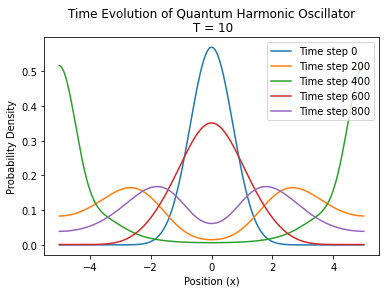

In [4]:
omega = 0.7
x_range = 5
N_space = 500
N_time = 1000
T_sim = 5
T_period = 10

x = np.linspace(-x_range,x_range,N_space)
x0 = 0
sigma = 1
initial_state = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * omega / 2 * (x - x0)**2)
initial_state /= np.sqrt(np.trapz(np.abs(initial_state)**2, x))  # Normalize the wavefunction

psi_t = time_evolution(initial_state, omega, x_range, N_space, N_time, T_sim, T_period)

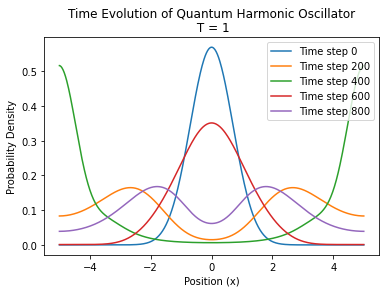

In [5]:
omega = 0.7
x_range = 5
N_space = 500
N_time = 1000
T_sim = 5
T_period = 1

x = np.linspace(-x_range,x_range,N_space)
x0 = 0
sigma = 1
initial_state = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * omega / 2 * (x - x0)**2)
initial_state /= np.sqrt(np.trapz(np.abs(initial_state)**2, x))  # Normalize the wavefunction

psi_t = time_evolution(initial_state, omega, x_range, N_space, N_time, T_sim, T_period)

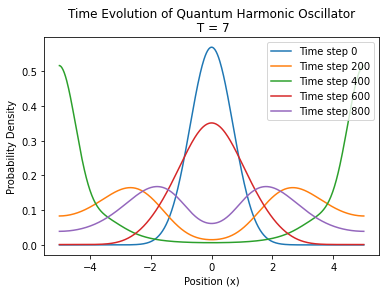

In [6]:
omega = 0.7
x_range = 5
N_space = 500
N_time = 1000
T_sim = 5
T_period = 7

x = np.linspace(-x_range,x_range,N_space)
x0 = 0
sigma = 1
initial_state = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * omega / 2 * (x - x0)**2)
initial_state /= np.sqrt(np.trapz(np.abs(initial_state)**2, x))  # Normalize the wavefunction

psi_t = time_evolution(initial_state, omega, x_range, N_space, N_time, T_sim, T_period)